In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
ff=pd.read_csv('sample_data/old.csv')
ff

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


Initially we had dataset of climate of two different regions of Algeria. We combined them so that it would reflect the entire country as a whole rather than separating regions. This way, we now have twice the data as before (122 to 244 dataset) and we can reduce the risk of overfitting. Also, since we are not interested in any sort of Time Series Analysis, we have removed any and all dates and years.


In [ ]:
import pandas as pd
ff2=pd.read_csv('sample_data/Algerian_forest_fires_dataset_UPDATE_ver2.csv')
ff2['Classes  '] = ff2['Classes  '].str.strip()
ff2

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,not fire
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


[Text(0.5, 1.0, 'Distribution of Rain Amount')]

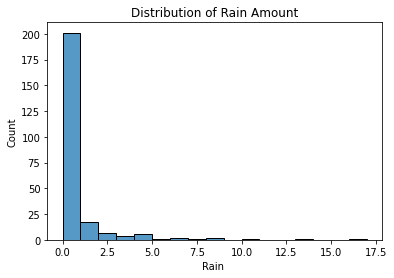

In [ ]:
import seaborn as sns
sns.histplot(data=ff2, x="Rain ",binwidth=1).set(title="Distribution of Rain Amount")


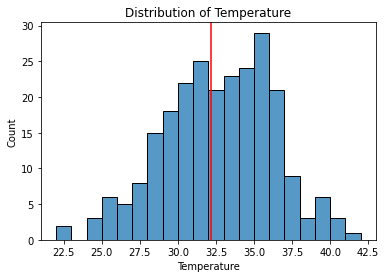

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=ff2, x="Temperature",binwidth=1).set(title="Distribution of Temperature")
plt.axvline(x=ff2.Temperature.mean(),color='red')

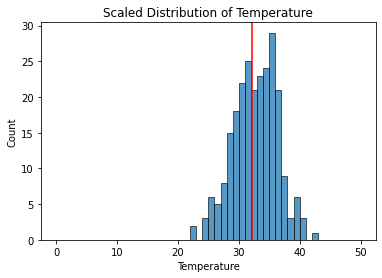

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=ff2, binrange=(0,50),x="Temperature",binwidth=1).set(title="Scaled Distribution of Temperature")
plt.axvline(x=ff2.Temperature.mean(),color='red')

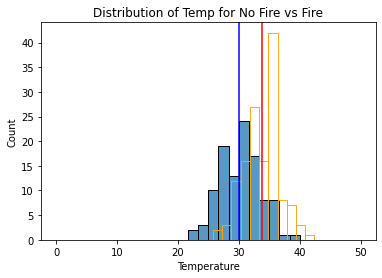

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

nofire=ff2.loc[ff2['Classes  ']=='not fire']
sns.histplot(data=nofire, binrange=(0,50),x="Temperature")
plt.axvline(x=nofire.Temperature.mean(),color='blue')
fire=ff2.loc[ff2['Classes  ']=='fire']
sns.histplot(data=fire,color='orange', binrange=(0,50),x="Temperature",fill=False).set(title="Distribution of Temp for No Fire vs Fire")
plt.axvline(x=fire.Temperature.mean(),color='red')

A DC Value was inputted incorrectly so it interpreted that column as a string. We have removed the error and now it is correctly a float variable

[Text(0.5, 1.0, 'Temperature vs Drought')]

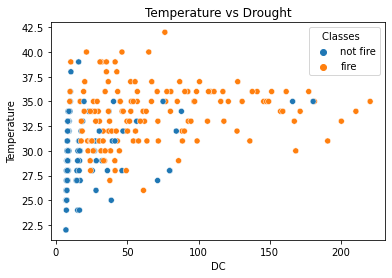

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sns.scatterplot(
    data=ff2, x="DC",y="Temperature", hue="Classes  "
).set(title="Temperature vs Drought")


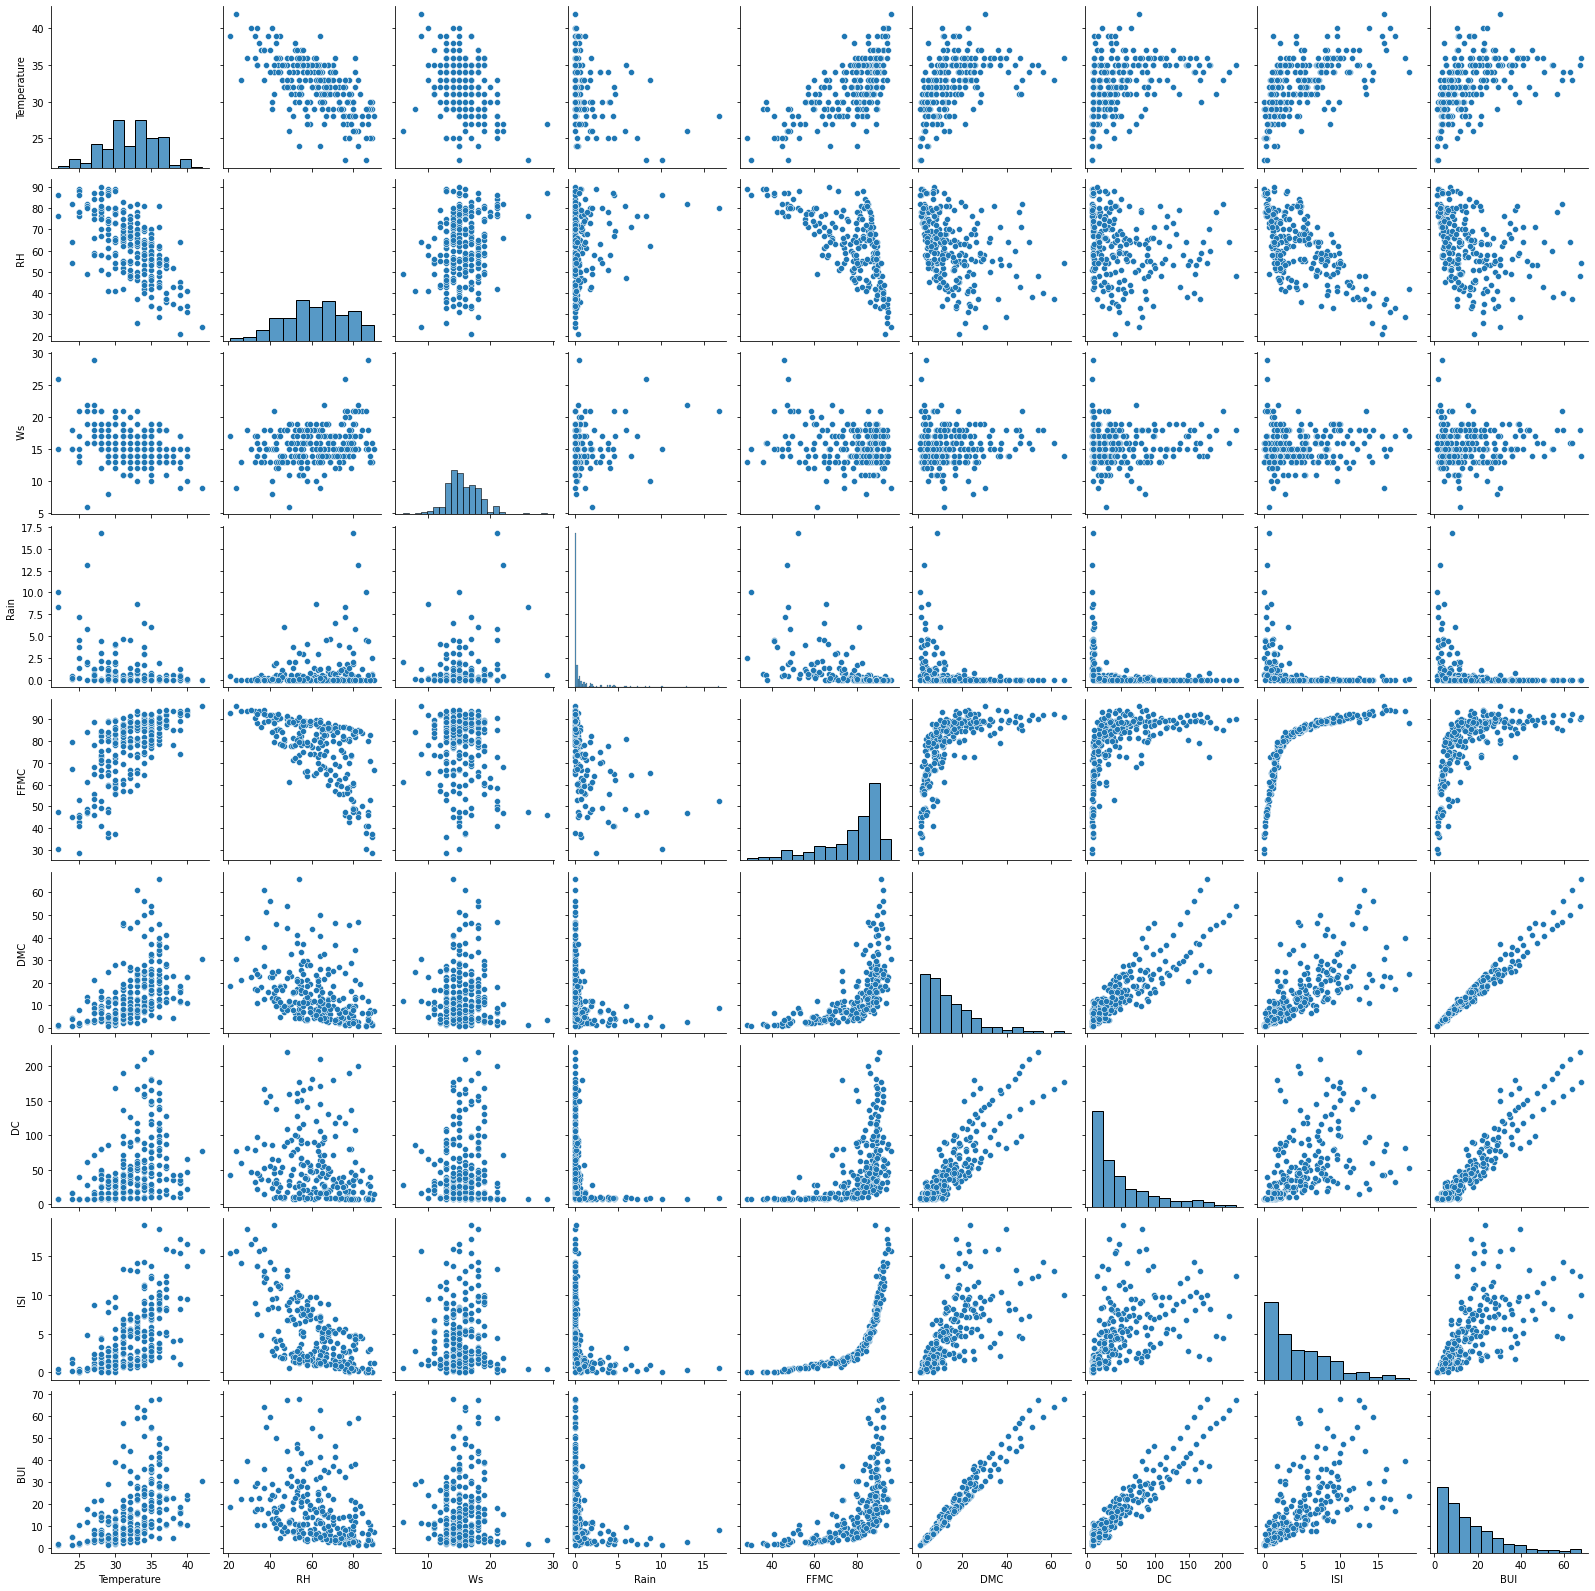

In [ ]:
sns.pairplot(ff2)